# Interactive plots

In [1]:
import pandas as pd
import altair as alt
cars = 'https://vega.github.io/vega-datasets/data/cars.json'
from vega_datasets import data


In [2]:
cars = data.cars()

## Selection

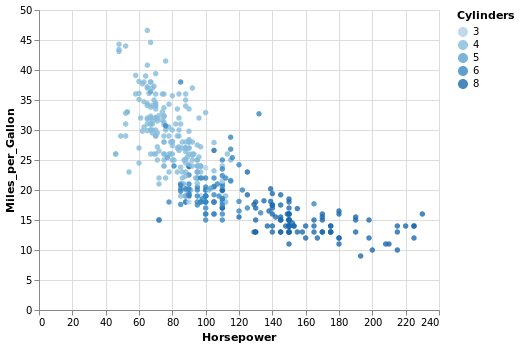

In [3]:
selection = alt.selection_single();
  
alt.Chart(cars).mark_circle().add_selection(
    selection
).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(selection, 'Cylinders:O', alt.value('grey')),
    opacity=alt.condition(selection, alt.value(0.8), alt.value(0.1))
)

In [4]:
def plot(selection):
    return alt.Chart(cars).mark_circle().add_selection(
            selection
            ).encode(
                x='Horsepower:Q',
                y='Miles_per_Gallon:Q',
                color=alt.condition(selection, 'Cylinders:O', alt.value('grey')),
                opacity=alt.condition(selection, alt.value(0.8), alt.value(0.1))
            ).properties(
                width=240,
                height=180
            )

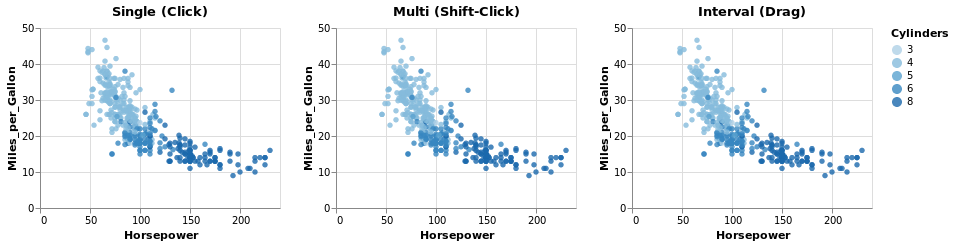

In [5]:
alt.hconcat(
  plot(alt.selection_single()).properties(title='Single (Click)'),
  plot(alt.selection_multi()).properties(title='Multi (Shift-Click)'),
  plot(alt.selection_interval()).properties(title='Interval (Drag)')
)

### Dynamic Queries

In [6]:
churn = pd.read_csv("data/churn.csv")
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

**Question?**

**Find list of Unique items in categgorical column** 

In [7]:
churnvals = [f for f in churn.Churn.unique() if f]
selectChurn = alt.selection_single(
    name='Select', # name the selection 'Select'
    fields=['Churn'], # limit selection to the Major_Genre field
    init={'Churn': churnvals[0]}, # use first genre entry as initial value
    bind=alt.binding_select(options=churnvals) # bind to a menu of unique genre values
)


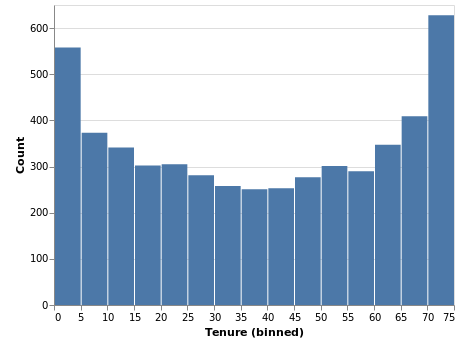

In [8]:

alt.Chart(churn).mark_bar().add_selection(
    selectChurn
).encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=20)),
    alt.Y("count()",title="Count")
).transform_filter(selectChurn)

### Cross Filtering

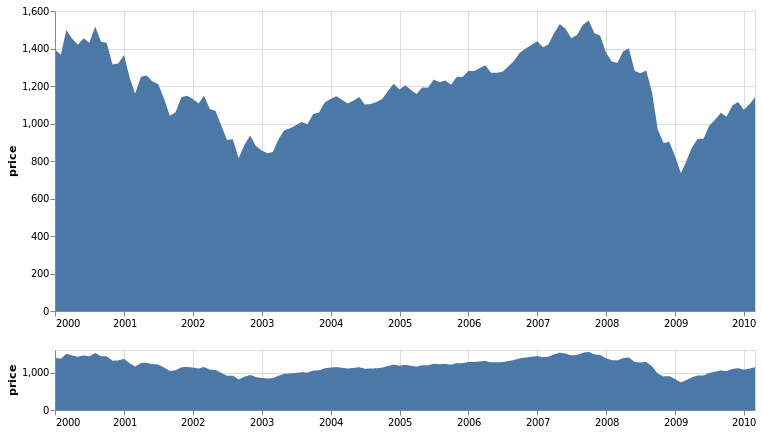

In [15]:
sp500 = 'https://vega.github.io/vega-datasets/data/sp500.csv'
brush = alt.selection_interval(encodings=['x']);

base = alt.Chart().mark_area().encode(
    alt.X('date:T', title=None),
    alt.Y('price:Q')
).properties(
    width=700
)
  
alt.vconcat(
    base.encode(alt.X('date:T', title=None, scale=alt.Scale(domain=brush))),
    base.add_selection(brush).properties(height=60),
    data=sp500
)